In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def cross_entropy(target,obs):
    assert len(target)==len(obs)
    obs = [x if x>=0 else 0 for x in obs]
    alpha = 1e-16
    if 0 in obs:
        obs = [(x+alpha)/(1+alpha*len(obs)) for x in obs]
    h = 0
    for p,q in zip(target,obs):
        if p==0:
            h += 0
        else:
            assert q>=0
            h += -p*np.log(q)
    return h

f = open('./benchmark_data/quantum_plotter_input_6_qubits_6_clusters_sametotal.p', 'rb' )
benchmarks = []
while 1:
    try:
        benchmarks.append(pickle.load(f))
    except EOFError:
        break

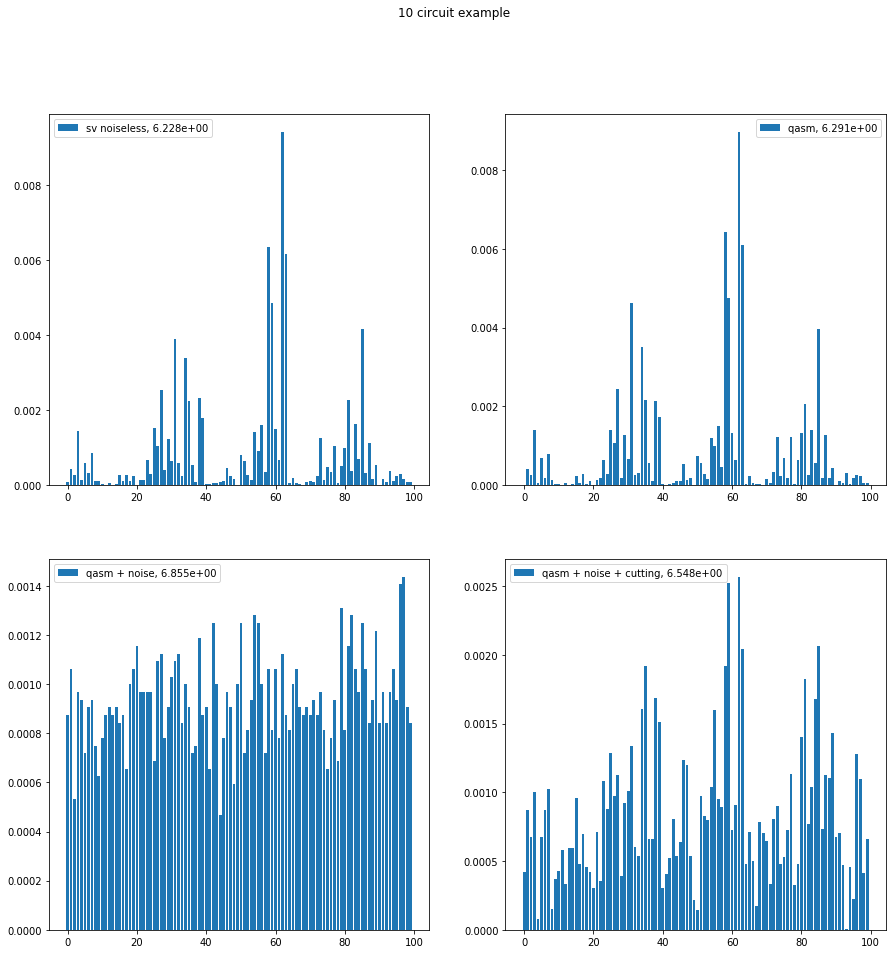

In [2]:
circuit_idx = 1
repetition_idx = 0
benchmark = benchmarks[repetition_idx][circuit_idx]
num_shots,searcher_time,circ,evaluations,classical_time,quantum_time,uniter_time = benchmark
d1 = evaluations['sv_noiseless']
d2 = evaluations['qasm']
d3 = evaluations['qasm+noise']
d4 = evaluations['qasm+noise+cutting']

plot_range = 100
x = np.arange(len(d1))[:plot_range]

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.bar(x,height=d1[:plot_range],label='sv noiseless, %.3e'%cross_entropy(d1,d1))
plt.legend()
plt.subplot(222)
plt.bar(x,height=d2[:plot_range],label='qasm, %.3e'%cross_entropy(d1,d2))
plt.legend()
plt.subplot(223)
plt.bar(x,height=d3[:plot_range],label='qasm + noise, %.3e'%cross_entropy(d1,d3))
plt.legend()
plt.subplot(224)
plt.bar(x,height=d4[:plot_range],label='qasm + noise + cutting, %.3e'%cross_entropy(d1,d4))
plt.legend()
plt.suptitle('%d circuit example'%len(circ.qubits))
# plt.savefig('ce_reduction_eg.png')